# Лабораторная работа 6. Сетевые алгоритмы. Динамические алгоритмы поиска путей.
# Выполнил студент группы БСТ2001 Ибодуллоев Умед Хуршедович

## Задание
1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 
2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 
3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.
4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.

## Варианты заданий:

Вариант | Задание
:-------- |:-----
1, 7, 13, 19, 25 | Алгоритм Флойда-Уоршелла
2, 8, 14, 20, 26 | Алгоритм Дейкстры
3, 9, 15, 21, 27 | Алгоритм Беллмана-Форда
4, 10, 16, 22, 28 | Алгоритм Джонсона
5, 11, 17, 23, 29| Алгоритм Левита
6, 12, 18, 24, 30 | Алгоритм Йена



## Выполнение:

1. Создаем произвольный граф на странице - "https://graphonline.ru"
2. Копируем матрицу смежности созданного графа - "Граф" -> "Матрица смежности"
3. Вставляем матрицу смежности в файл - "graph.txt"
4. Запустите программу и введите начальную и конечную вершины

In [114]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import math
import copy
import time
%matplotlib inline

In [115]:
def read_matrix(filename):
    my_file = open(filename, 'r', encoding = "utf-8")
    matrix = []
    for line in my_file:
        node = line.split(", ")
        node.pop(-1)
        temp = []
        for element in node:
            temp.append(int(element))
        matrix.append(temp)
    my_file.close()
    return matrix

 
def create_graph(graph, matrix, way = [], node_color='grey',edge_color = 'grey', edge_text_pos = 0.5, node_size=1500, 
                 node_alpha=0.3,way_color = 'green', edge_alpha=0.3, edge_tickness=3, node_text_size=14, text_font='arial'):
    
    plt.figure(num=None, figsize=(10, 10), dpi=100)
    matrix_size = len(matrix)
    way_edge = []
    for i in range(len(way) - 1):
        way_edge.append((way[i], way[i + 1]))
        
    node_colors = []
    for i in range(matrix_size):
        graph.add_node(i + 1,pos = (i + 2,i * 2))
        if i + 1 in way:
            node_colors.append(way_color)
        else:
            node_colors.append(node_color)
        
    edges = []
    sides = []
    edge_colors = []
    for i in range(matrix_size):
        for j in range(matrix_size):
            if matrix[i][j] != 0:
                graph.add_edge(i + 1, j + 1, weight = matrix[i][j])
                edges.append((i + 1, j + 1))
                sides.append(matrix[i][j])
                if (i + 1, j + 1) not in way_edge: edge_colors.append(edge_color)
                else:
                    edge_colors.append(way_color)
   
    # layout set
    graph_pos = nx.circular_layout(graph)
    # draw graph
    nx.draw_networkx_nodes(graph,graph_pos,node_size=node_size, alpha=node_alpha, node_color=node_colors)
    nx.draw_networkx_edges(graph,graph_pos,width=edge_tickness, alpha=edge_alpha,edge_color=edge_colors)
    nx.draw_networkx_labels(graph, graph_pos,font_size=node_text_size, font_family=text_font)
    
    edge_labels = dict(zip(edges, sides))
    nx.draw_networkx_edge_labels(graph, graph_pos, edge_labels=edge_labels, label_pos=edge_text_pos)

    # show graph
    plt.show()

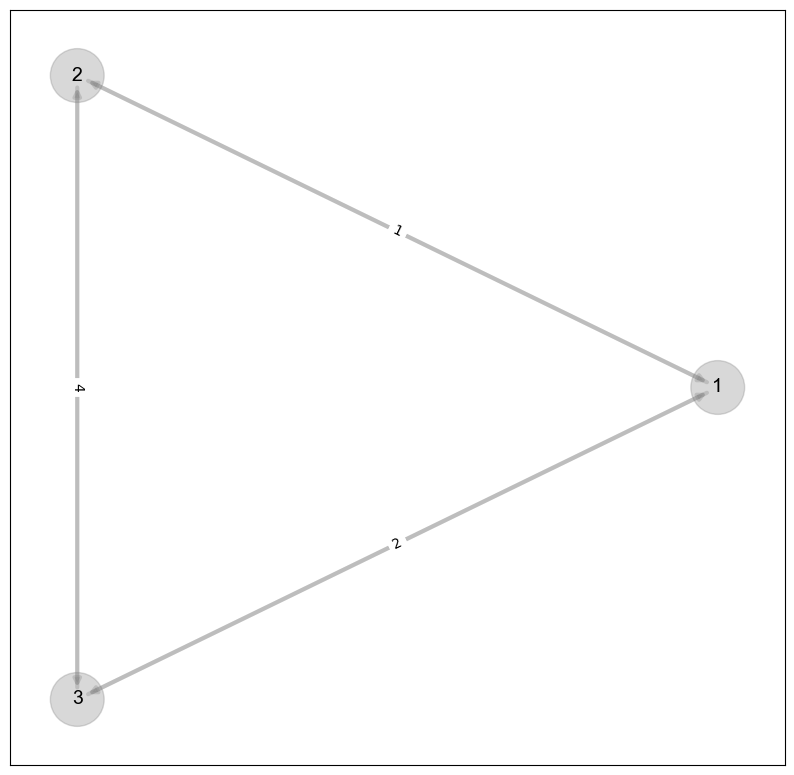

In [117]:
graph = nx.DiGraph()
matrix = read_matrix('graph.txt')
create_graph(graph, matrix)

labels = nx.get_edge_attributes(graph,'weight')
nodes_len = len(graph.nodes)
adj_matrix = np.array([[math.inf] * nodes_len] * nodes_len)
for pos, length in labels.items():
    adj_matrix[pos[0] - 1][pos[1] - 1] = length

paths_search_time = dict()

Введите номер начальной вершины:  1
Введите номер конечной вершины:  3


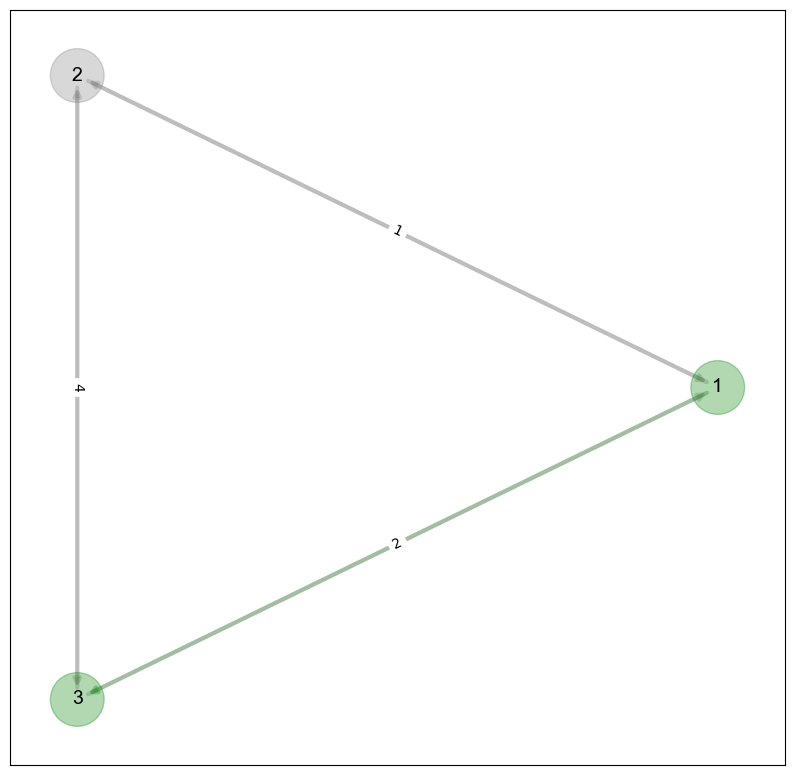

In [118]:
def fw_get_path(path, start, end):
    way = [start]
    while start != end:
        start = path[start][end]
        way.append(start)
    for i in range(len(way)):
        way[i] += 1
    return way

    
def floyd_warshall_path(matrix, start, end):
    start -= 1
    end -= 1
    for i in range(len(matrix)):
        matrix[i][i] = 0
   
    path = [[v for v in range(len(matrix))] for u in range(len(matrix))]
    for k in range(len(matrix)):                # k таблиц -в конце кратчайшие пути 
        for i in range(len(matrix)):
            for j in range(len(matrix)):
                if matrix[i][k] < math.inf and matrix[k][j] < math.inf and matrix[i][j] > matrix[i][k] + matrix[k][j]:
                    matrix[i][j] = matrix[i][k] + matrix[k][j]
                    path[i][j] = path[i][k]
    
    return fw_get_path(path,start,end)

start = int(input(f"Введите номер начальной вершины: "))
end = int(input(f"Введите номер конечной вершины: "))
create_graph(graph, matrix, way = floyd_warshall_path(copy.deepcopy(adj_matrix), start, end))